In [49]:
import pandas as pd
import numpy as np
import pymysql

In [316]:
db=pymysql.connect(host='localhost',port=3306,user='root',
                   passwd='661400',db='plt',charset='utf8',
                  cursorclass=pymysql.cursors.DictCursor)

In [317]:
cs=db.cursor()

In [318]:
sql='''select * from plt.sales'''
cs.execute(sql)

1145

In [173]:
res=cs.fetchall()

In [174]:
db.close()

In [319]:
month_sales=pd.DataFrame(res)
month_sales

,country,DATE,Sales,Month,Day
0,United Kingdom,2011-01-04,15.795225,01,04
1,United Kingdom,2011-01-05,28.173124,01,05
2,France,2011-01-05,18.799730,01,05
3,United Kingdom,2011-01-06,22.531391,01,06
4,Australia,2011-01-06,149.049583,01,06
...,...,...,...,...,...
1140,EIRE,2011-12-08,15.057500,12,08
1141,United Kingdom,2011-12-09,410.898810,12,09
1142,Belgium,2011-12-09,12.272941,12,09
1143,Germany,2011-12-09,20.606341,12,09


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("pastel")
# sns.palplot(palette)

In [92]:
import datetime as dt

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("pastel")
# sns.palplot(palette)
# 한글 문제
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# X축 표시를 위한 월별 첫날 출력
1일에 구매가 없는 달도 존재하므로 월별 첫날을 기준으로 x축을 표시해야함.

In [183]:
month_sales['Day']=month_sales['Day'].astype('int')

In [195]:
first=pd.pivot_table(month_sales,index='Month',values='Day',aggfunc='min')
first

,Day
Month,
01,4
02,1
03,1
04,1
05,1
06,1
07,1
08,1
09,1


In [190]:
m=pd.date_range(start='20110101',periods=12,freq='M')
m

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31'],
              dtype='datetime64[ns]', freq='M')

In [200]:
month_x=[str(i).split(' ')[0][:7]+'-0'+str(j) for i,j in zip(pd.date_range(start='2011-01-01',periods=12,freq='MS'),first.Day)]
month_x

['2011-01-04',
 '2011-02-01',
 '2011-03-01',
 '2011-04-01',
 '2011-05-01',
 '2011-06-01',
 '2011-07-01',
 '2011-08-01',
 '2011-09-01',
 '2011-10-02',
 '2011-11-01',
 '2011-12-01']

In [201]:
labels=[str(i)+'월' for i in range(1,13)]

In [202]:
labels

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [310]:
x=month_sales.DATE
x

0       2011-01-04
1       2011-01-05
2       2011-01-05
3       2011-01-06
4       2011-01-06
           ...    
1140    2011-12-08
1141    2011-12-09
1142    2011-12-09
1143    2011-12-09
1144    2011-12-09
Name: DATE, Length: 1145, dtype: object

In [320]:
sql2='''select A.country,A.Date,B.mx from plt.sales A, (select country,month,max(sales) mx from plt.sales group by 2) B
where A.sales=B.mx and A.month=B.month'''
cs.execute(sql2)

12

In [321]:
max_values=cs.fetchall()

In [322]:
mv=pd.DataFrame(max_values)
mv

,country,Date,mx
0,EIRE,2011-01-14,409.139512
1,Australia,2011-02-15,203.230725
2,EIRE,2011-03-11,1687.170000
3,France,2011-04-05,1136.300000
4,Netherlands,2011-05-25,1392.000000
5,Netherlands,2011-06-01,208.569231
6,Spain,2011-07-04,276.422667
7,Australia,2011-08-18,225.571546
8,Australia,2011-09-01,326.857778
9,Netherlands,2011-10-27,356.972143


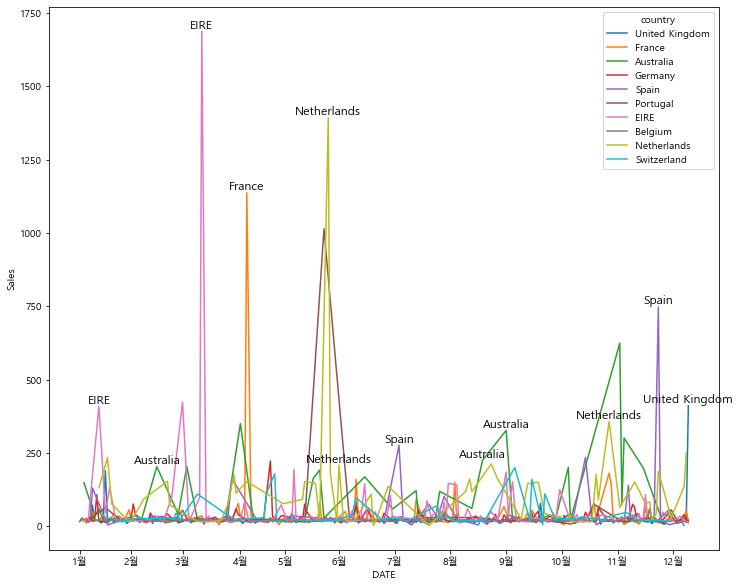

In [346]:
plt.figure(figsize=(12,10))
graph=sns.lineplot(x='DATE',y='Sales',hue='country',data=month_sales)
plt.xticks(month_x,labels=labels)
for i in range(len(month_sales.DATE)):
    height = month_sales['Sales'][i]
    values=month_sales['country'][i]
    if height in mv['mx'].values:
        plt.text(x[i], height + 0.25,values,ha='center', va='bottom', size = 12)
#         plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)

In [302]:
max_sales=pd.pivot_table(month_sales,index='country',columns=['Month'],values='Sales',aggfunc='max')

In [304]:
hm=max_sales.style.background_gradient(cmap = "PuBu")

In [305]:
hm

Month,01,02,03,04,05,06,07,08,09,10,11,12
country,,,,,,,,,,,,
Australia,149.049583,203.230725,203.985854,350.000000,191.590000,168.538201,121.580870,225.571546,326.857778,200.875244,624.240000,nan
Belgium,21.005161,49.983333,23.804667,22.471667,21.859091,26.016000,48.085000,19.947436,37.781176,29.246863,61.199412,17.975400
EIRE,409.139512,98.680000,1687.170000,84.417931,193.459000,144.631613,146.670404,140.164516,184.788571,40.376250,107.767727,34.552941
France,56.124531,26.886842,77.688750,1136.300000,79.885714,160.000000,91.546000,150.277500,54.819592,181.267500,65.636667,55.300000
Germany,107.635714,75.600000,59.814286,222.750000,75.560559,69.711111,55.831429,41.343333,51.725952,64.145238,74.900000,39.989722
Netherlands,234.001212,153.609076,175.456731,152.280000,1392.000000,208.569231,2.602000,212.400000,150.175769,356.972143,186.641481,250.600000
Portugal,63.100556,22.643023,28.039107,22.926667,1013.893333,19.572400,29.844643,29.790244,21.588889,74.875000,56.000000,32.655909
Spain,130.408571,34.320000,163.500000,18.969565,34.840000,20.338462,276.422667,28.296667,28.008974,235.222667,747.500000,14.338333
Switzerland,28.608175,44.837500,109.820000,179.000000,25.407553,96.985625,71.333333,20.906429,200.000000,32.208095,47.386794,nan


# 박스플랏

In [351]:
c=np.unique(month_sales.country)

In [393]:
idx=[]

In [394]:
for i in c:
    v=month_sales[month_sales['country']==i].Sales
    # IQR 제거 후 박스플랏
    q3=np.quantile(v,0.75)
    q1=np.quantile(v,0.25)
    iqr=q3-q1
    l=iqr-1.5*(iqr)
    u=iqr+1.5*(iqr)

    idx.append(v[(v>l)&(v<u)].index)

In [420]:
for i in idx:
    print(len(i))

40
8
115
83
151
58
34
45
35
130


In [416]:
df=[]

In [417]:
for i in range(len(idx)):
    df.append(month_sales.iloc[idx[i],:])
    test=pd.concat(df,axis=0)

In [418]:
test

,country,DATE,Sales,Month,Day
4,Australia,2011-01-06,149.049583,01,06
17,Australia,2011-01-10,81.600000,01,10
21,Australia,2011-01-11,24.342105,01,11
33,Australia,2011-01-14,59.000000,01,14
39,Australia,2011-01-17,22.700000,01,17
...,...,...,...,...,...
1094,United Kingdom,2011-11-29,16.152258,11,29
1100,United Kingdom,2011-11-30,17.941901,11,30
1115,United Kingdom,2011-12-04,9.634715,12,04
1119,United Kingdom,2011-12-05,16.917203,12,05


<AxesSubplot:xlabel='country', ylabel='Sales'>

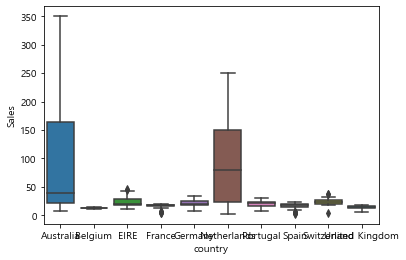

In [421]:
sns.boxplot(x='country',y='Sales',data=test)